# Coding Block 1 - Random Forests (and XGBoost)

### Load the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
'''
...
'''

'\n...\n'

### Read the dataset 
You can also compare processed and non-processed data.

In [4]:
df = pd.read_csv('../data/df_imputed_clean.csv')

### Split the data and train a Random Forest model

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Daten laden
file_path = "../data/df_imputed_clean.csv"
df = pd.read_csv(file_path)

# Unnötige Spalte entfernen
df = df.drop(columns=["Unnamed: 0"])

# Features und Zielvariable definieren
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Daten in Trainings- und Testsets aufteilen (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Modell initialisieren und trainieren
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = rf_model.predict(X_test)

# Modellbewertung
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        97
         1.0       0.73      0.78      0.75        49

    accuracy                           0.83       146
   macro avg       0.81      0.82      0.81       146
weighted avg       0.83      0.83      0.83       146



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Optimized Random Forest Accuracy: 0.77
Optimized Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        97
         1.0       0.68      0.61      0.65        49

    accuracy                           0.77       146
   macro avg       0.75      0.73      0.74       146
weighted avg       0.77      0.77      0.77       146

Optimized Random Forest Cross-Validation Accuracy: 0.75


/var/folders/5w/h4z5hq9j70s0kq9njbq1fktc0000gn/T/ipykernel_33802/3531931986.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


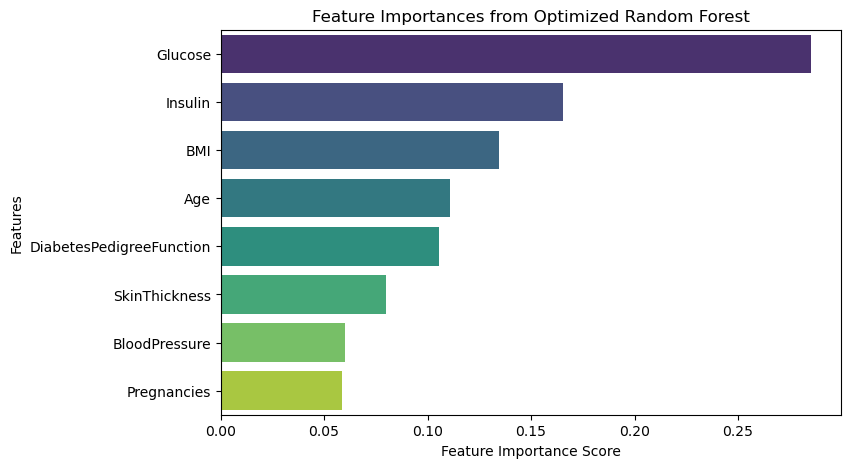

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
file_path = "../data/df_imputed_clean.csv"
df = pd.read_csv(file_path)

# Unnötige Spalte entfernen
df = df.drop(columns=["Unnamed: 0"])

# Features und Zielvariable definieren
X = df.drop(columns=["Outcome", "Outlier", "Multivariate_Outlier", "Mahalanobis_Distance"])
y = df["Outcome"]

# Daten in Trainings- und Testsets aufteilen (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter-Tuning für Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Bestes Modell speichern
best_rf = grid_search.best_estimator_

# Vorhersagen treffen
y_pred = best_rf.predict(X_test)

# Modellbewertung
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Optimized Random Forest Accuracy: {accuracy:.2f}")
print("Optimized Classification Report:\n", classification_rep)

# Cross-Validation Score berechnen
rf_cv_score = cross_val_score(best_rf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
print(f"Optimized Random Forest Cross-Validation Accuracy: {rf_cv_score.mean():.2f}")

# Feature Importance visualisieren
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances from Optimized Random Forest")
plt.show()


### Evaluate the prediction models using a classification report

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        97
         1.0       0.73      0.78      0.75        49

    accuracy                           0.83       146
   macro avg       0.81      0.82      0.81       146
weighted avg       0.83      0.83      0.83       146



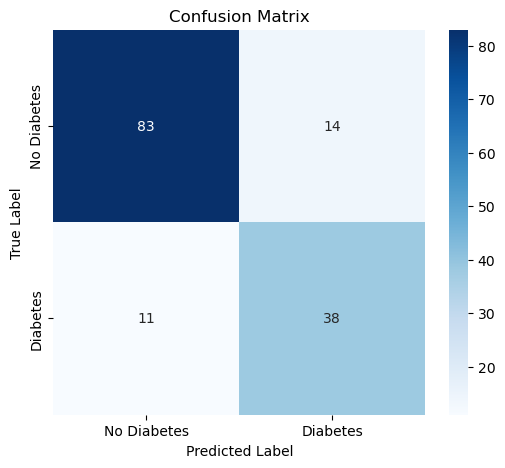

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Vorhersagen auf den Testdaten
y_pred = rf_model.predict(X_test)

# Modellbewertung
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

# Confusion Matrix berechnen
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Print the feature importances of the random forest

Feature Importances:
 Glucose                     0.200609
Mahalanobis_Distance        0.192960
Insulin                     0.131571
BMI                         0.104701
Age                         0.094169
DiabetesPedigreeFunction    0.090841
SkinThickness               0.075419
BloodPressure               0.055414
Pregnancies                 0.054034
Outlier                     0.000282
Multivariate_Outlier        0.000000
dtype: float64


/var/folders/5w/h4z5hq9j70s0kq9njbq1fktc0000gn/T/ipykernel_33802/3825097273.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


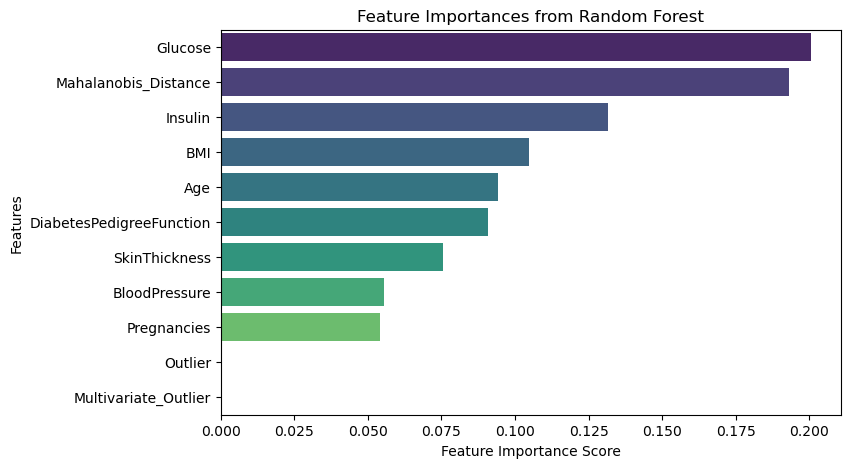

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importances extrahieren
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sortieren nach Wichtigkeit
feature_importances = feature_importances.sort_values(ascending=False)

# Ausgabe der Feature-Wichtigkeiten
print("Feature Importances:\n", feature_importances)

# Visualisierung der Feature Importances
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.show()


### Extra: Also train a XGBoost model and compare the results.

In [11]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# XGBoost Modell initialisieren und trainieren
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Vorhersagen mit XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Modellbewertung für XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("XGBoost Classification Report:\n", classification_rep_xgb)

# Vergleich mit Random Forest
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("Random Forest Classification Report:\n", classification_rep)


XGBoost Accuracy: 0.75
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        97
         1.0       0.62      0.63      0.63        49

    accuracy                           0.75       146
   macro avg       0.72      0.72      0.72       146
weighted avg       0.75      0.75      0.75       146

Random Forest Accuracy: 0.83
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        97
         1.0       0.73      0.78      0.75        49

    accuracy                           0.83       146
   macro avg       0.81      0.82      0.81       146
weighted avg       0.83      0.83      0.83       146



/Applications/anaconda3/envs/aa_tuesday/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:04:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [17]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Optimiertes XGBoost Modell mit manuell gesetzten Hyperparametern
best_xgb = xgb.XGBClassifier(
    n_estimators=200,  # Optimale Anzahl von Bäumen
    learning_rate=0.1,  # Optimaler Lernrate-Wert
    max_depth=5,  # Baumtiefe
    subsample=0.8,  # Anteil der Trainingsdaten pro Baum
    colsample_bytree=0.8,  # Anteil der Features pro Baum
    random_state=42,
    eval_metric="logloss"
)

# Training des optimierten XGBoost Modells
best_xgb.fit(X_train, y_train)

# Cross-Validation für Random Forest
rf_cv_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)

# Ergebnisse ausgeben
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_score.mean():.2f}")


Random Forest Cross-Validation Accuracy: 0.76


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Daten laden
file_path = "../data/df_imputed_clean.csv"
df = pd.read_csv(file_path)

# Unnötige Spalte entfernen
df = df.drop(columns=["Unnamed: 0"])

# Features und Zielvariable definieren
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Fehlende Werte durch den Median ersetzen
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

# Feature Selection: Recursive Feature Elimination (RFE) mit Random Forest
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_selector, n_features_to_select=6)  # Behalte die Top 6 Features
X = rfe.fit_transform(X, y)

# Feature Engineering: Polynomial Features (Interaktionen zwischen Features)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X = poly.fit_transform(X)

# Daten in Trainings- und Testsets aufteilen (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Daten normalisieren (StandardScaler für bessere Performance von SVC und KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dimensionalitätsreduktion (PCA)
pca = PCA(n_components=10)  # Reduziere auf 10 Hauptkomponenten
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Basismodelle definieren (4 Modelle)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),  # Support Vector Classifier
    ('knn', KNeighborsClassifier(n_neighbors=5))  # K-Nearest Neighbors
]

# Meta-Modell (Final Model)
meta_model = LogisticRegression()

# Stacking Classifier erstellen
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Stacking-Modell trainieren
stacking_model.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = stacking_model.predict(X_test)

# Modellbewertung
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Stacking Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Stacking Model Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87        97
         1.0       0.77      0.69      0.73        49

    accuracy                           0.83       146
   macro avg       0.81      0.80      0.80       146
weighted avg       0.83      0.83      0.83       146



In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Daten laden
file_path = "../data/df_imputed_clean.csv"
df = pd.read_csv(file_path)

# Unnötige Spalte entfernen
df = df.drop(columns=["Unnamed: 0"])

# Features und Zielvariable definieren
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Feature Selection: Recursive Feature Elimination (RFE) mit Random Forest
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_selector, n_features_to_select=6)  # Behalte die Top 6 Features
X = rfe.fit_transform(X, y)

# Feature Engineering: Polynomial Features (Interaktionen zwischen Features)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X = poly.fit_transform(X)

# Daten in Trainings- und Testsets aufteilen (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Daten normalisieren mit MinMaxScaler (Wertebereich 0-1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dimensionalitätsreduktion (PCA)
pca = PCA(n_components=10)  # Reduziere auf 10 Hauptkomponenten
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Basismodelle definieren (4 Modelle)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),  # Support Vector Classifier
    ('knn', KNeighborsClassifier(n_neighbors=5))  # K-Nearest Neighbors
]

# Meta-Modell (Final Model)
meta_model = LogisticRegression()

# Stacking Classifier erstellen
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Stacking-Modell trainieren
stacking_model.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = stacking_model.predict(X_test)

# Modellbewertung
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Stacking Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Stacking Model Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84        97
         1.0       0.70      0.63      0.67        49

    accuracy                           0.79       146
   macro avg       0.76      0.75      0.76       146
weighted avg       0.78      0.79      0.78       146

